In [1]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/Users/marchen/Desktop/programming/AI/13th week/file/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df2 = df.iloc[:, 1:-2]
df2

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [5]:
openValues = df2[['Open']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

In [7]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [8]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 40)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
         )
model.add(Dense(1))

/Users/marchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0047
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0024
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0031
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0024
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0024
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0021
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0025
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0025
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0019
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0022
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0027
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0022
Epoch 15/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2

In [11]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


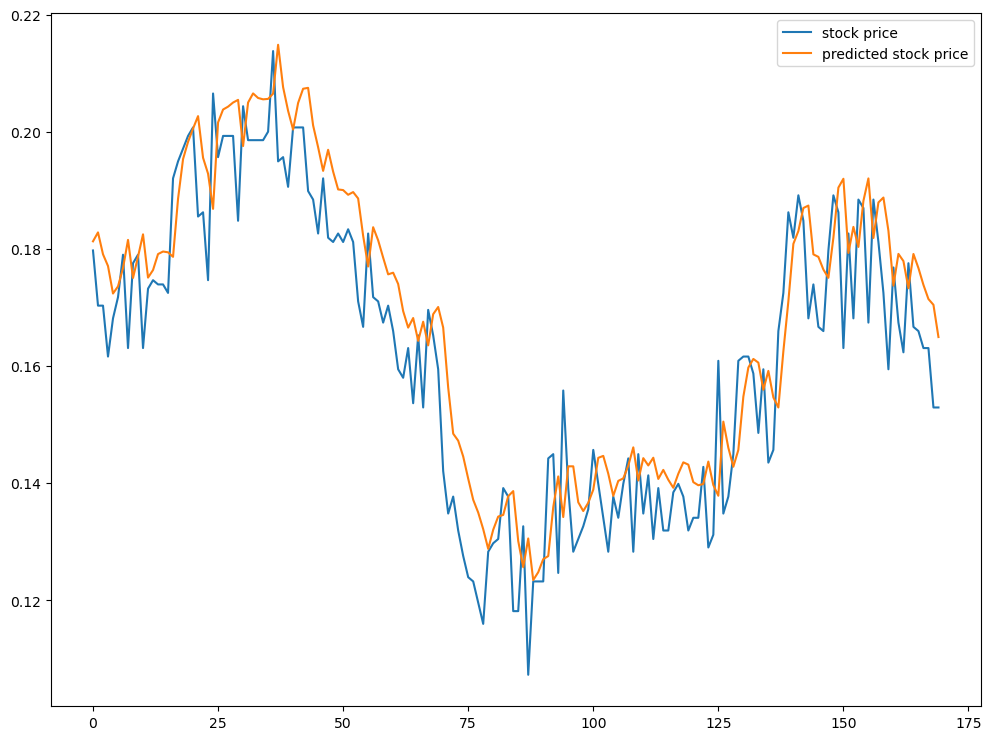

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()